<a href="https://colab.research.google.com/github/dolidovich1/Mikhail-Dolidovich/blob/main/Task%207.2%20SPPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from matplotlib import pylab as plt
from matplotlib import colors
import numpy as np
import math
from itertools import product

In [8]:
def triangle_FS (U, a = None, b = None, c = None, d = None, h = 1, form = 'equal'):
  if form in ['equal', 'greater', 'less']:
    if a is None:
      a = U.min()
    if c is None:
      c = U.max()
    if b is None:
      if d is None:
        b = (a + c) / 2.
      else:
        b=d
    if d is None:
      d = b
    Mu = dict()
    if a > U.min():
      for el in U[U <= a]:
        Mu[el] = h if form == 'less' else 0.
    if c < U.max():
      for el in U[U >= c]:
        r = h if form == 'greater' else 0.
        z = Mu.get(el, 0)
        Mu[el] = r if r > z else z
    if a < b:
      for el in U[(U >= a)*(U <= b)]:
        r = 0. if form == 'greater' else h * float (el - a) / (b - a) if form == 'equal' else h * float (b - el) / (b - a)
        z = Mu.get(el, 0)
        Mu[el] = r if r > z else z
    if b < d:
      for el in U[(U >= b) * (U >= d)]:
        r = h if form == 'equal' else 0.
        z = Mu.get(el, 0)
        Mu[el] = r if r > z else z
    if d < c:
      for el in U[(U >= d) * (U <= c)]:
         r = 0. if form == 'less' else h * float (el - d) / (c - d) if form == 'greater' else h * float (c - el) / (c - d)
         z = Mu.get(el, 0)
         Mu[el] = r if r > z else z
    return Mu
  else:
    print ('Unknown form')
    return None

In [9]:
def FS_plot(FS, colors = list(colors.cnames.keys()), labels = None, title = None, name = None):
  for idx, el in enumerate(FS):
    mas = np.array(sorted(list(el.items()), key = lambda x: x[0])).T
    if (labels is None):
      lab = ' '
    else:
      lab = labels[idx]
    plt.plot(mas[0], mas[1], color = colors[idx], label = lab)
  if not (labels is None):
    plt.legend(loc = 'upper right')
  if not (title is None):
    plt.title(title)
  if not (name is None):
    plt.savefig(name + '.png', format = 'png', dpi = 100)
  plt.show()

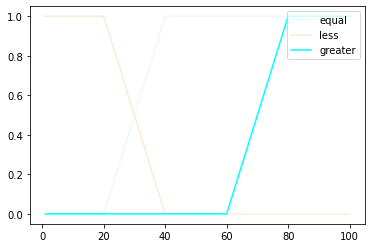

In [10]:
Spr = np.arange(1,101,1)
Pr1 = triangle_FS(Spr, a = 20, b=40, d = 60, c = 80)
Pr2 = triangle_FS(Spr, a = 20, b=40, d = 60, c = 80, form = 'less')
Pr3 = triangle_FS(Spr, a = 20, b=40, d = 60, c = 80, form = 'greater')
FS_plot([Pr1, Pr2, Pr3], labels = ['equal', 'less', 'greater'])

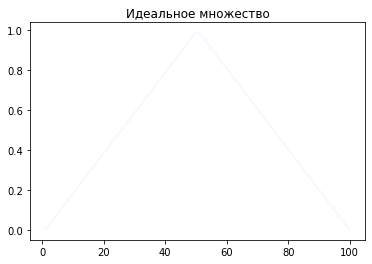

In [15]:
Pr4 = triangle_FS(Spr)
FS_plot([Pr4], title ='Идеальное множество')

In [ ]:
Pr1[25]

0.25